In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()

In [13]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['species'] = iris.target

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: ylabel='count'>

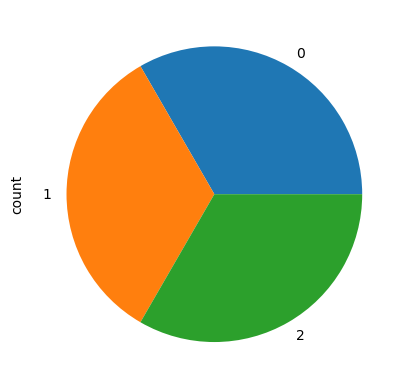

In [40]:
df['species'].value_counts().plot(kind='pie')

In [42]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('species',axis=1)
y = df['species']

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)


In [52]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()

In [58]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [82]:
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score
for name, model in models.items():
    print(f"\n{name} Classifier Results:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("Classification Report:\n", classification_report(y_test, y_pred))


KNN Classifier Results:
Accuracy: 0.9555555555555556
Confusion Matrix:
 [[14  0  0]
 [ 0 15  2]
 [ 0  0 14]]
Precision: 0.9611111111111111
Recall: 0.9555555555555556
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.94        17
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


SVM Classifier Results:
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[14  0  0]
 [ 0 16  1]
 [ 0  0 14]]
Precision: 0.9792592592592592
Recall: 0.9777777777777777
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        17
           2       0.93      1.00      0.97        14

    accuracy       